# 🍃 Cannabis Leaf Disease Classifier
Train CNN Model using MobileNetV2 on CS-1 Dataset

In [1]:
# ✅ STEP 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# ✅ STEP 2: Set Dataset Paths
train_dir = 'CS-1/Train'
test_dir = 'CS-1/Test'

In [3]:
# ✅ STEP 3: Data Generator
img_size = 224
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)
test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6464 images belonging to 10 classes.
Found 1824 images belonging to 10 classes.


In [4]:
# ✅ STEP 4: Build Model
base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
# ✅ STEP 5: Train
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10


c:\Users\loukf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 579s 3s/step - accuracy: 0.6757 - loss: 0.9802 - val_accuracy: 0.8322 - val_loss: 0.4891
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.8888 - loss: 0.3309 - val_accuracy: 0.8602 - val_loss: 0.4613
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.9186 - loss: 0.2306 - val_accuracy: 0.8465 - val_loss: 0.4582
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.9346 - loss: 0.1793 - val_accuracy: 0.8448 - val_loss: 0.4877
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.9513 - loss: 0.1481 - val_accuracy: 0.8476 - val_loss: 0.5433
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 461s 2s/step - accuracy: 0.9463 - loss: 0.1513 - val_accuracy: 0.8591 - val_loss: 0.4249
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.9543 - loss: 0.1337 - val_accuracy: 0.8854 - val_loss: 0.4501
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 478s 2s/step - accuracy: 0.9534 - loss: 0.1194 - val_accuracy: 0.873

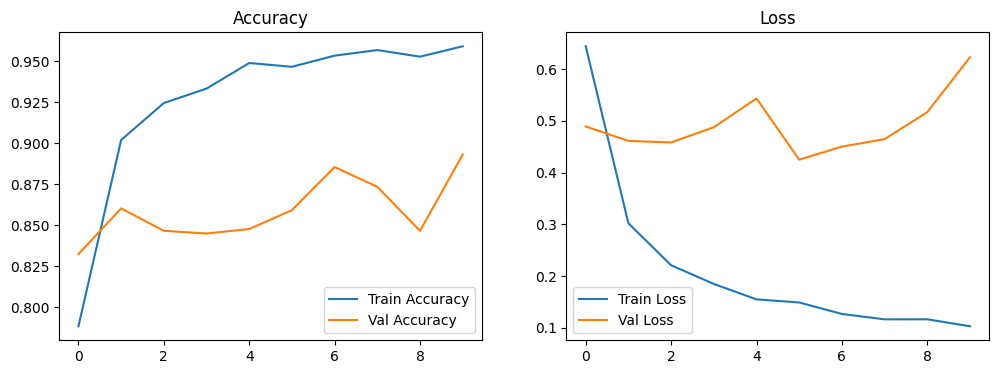

In [ ]:
# ✅ STEP 6: Evaluate
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step


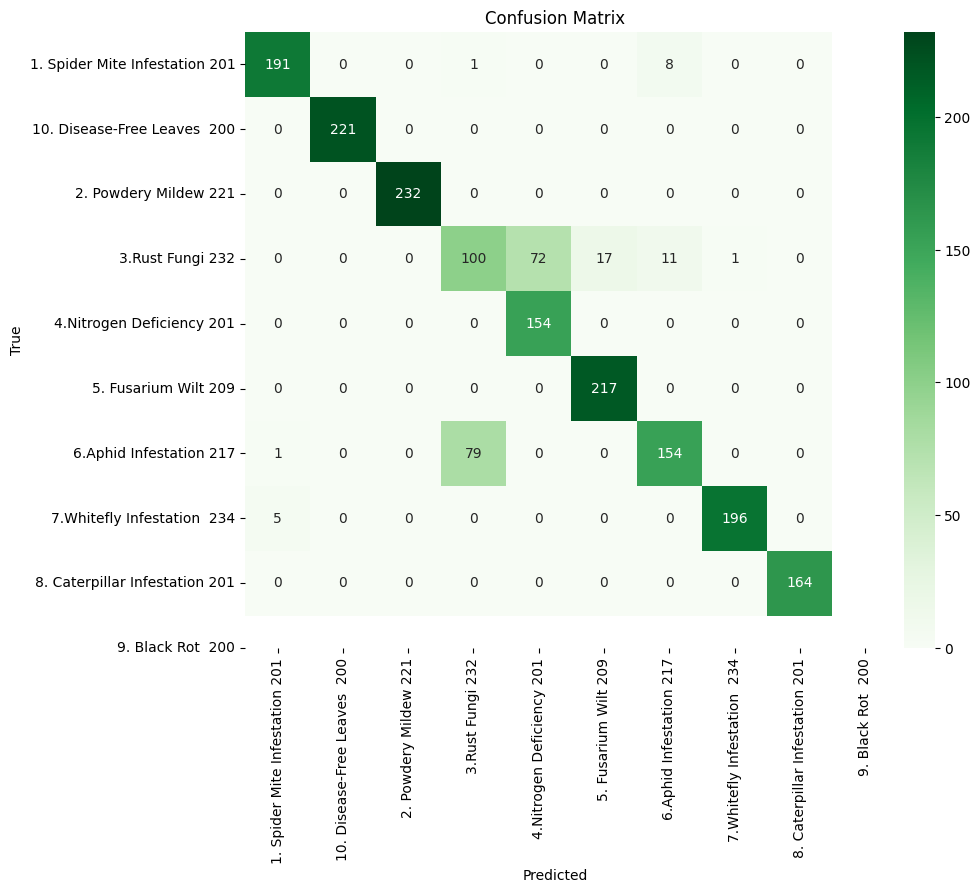

In [7]:
# ✅ STEP 7: Confusion Matrix
pred = model.predict(test_data)
y_pred = np.argmax(pred, axis=1)
y_true = test_data.classes
class_names = list(test_data.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# ✅ STEP 8: Save Model
model.save('cannabis_leaf_model.h5')
print("Model saved as cannabis_leaf_model.h5")

Model saved as cannabis_leaf_model.h5
